# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [96]:
!pip install ipython-autotime
 
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.74 s (started: 2021-06-04 07:48:23 +00:00)


In [97]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm
from collections import Counter
import os
import operator
from scipy.spatial import distance
# add more imports here if you like
# ...

time: 5.38 ms (started: 2021-06-04 07:48:26 +00:00)


In [98]:
# if you use Google Colab:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.93 ms (started: 2021-06-04 07:48:26 +00:00)


In [99]:
# change this line your folder where the data is found
basedir = '/content/drive/MyDrive/Computational Data science/'

time: 1.75 ms (started: 2021-06-04 07:48:26 +00:00)


In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [100]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

time: 2.32 ms (started: 2021-06-04 07:48:26 +00:00)


In [101]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Lock on bedroom door"", ""Carbon monoxide alar...",$59.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,12,42,62,123,2020-12-13,278,1,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36509,4.89354,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Wifi"", ""Hot water"", ""Hangers"", ""Host greets ...",$236.00,1,365,4.0,4.0,60.0,365.0,4.0,300.8,NaN,t,3,3,3,3,2020-12-13,339,31,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,100%,57%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Microwave"", ""Refrigerator"", ""Dishes and silv...",$125.00,14,180,14.0,14

time: 761 ms (started: 2021-06-04 07:48:26 +00:00)


## Question 1a

In [102]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
  drop_col=df.drop(['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 'amenities','neighborhood_overview', 
                    'picture_url','host_url', 'host_about', 'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url', 
                    'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                    'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count',
                    'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                    'calculated_host_listings_count_shared_rooms'],axis=1,inplace=True)
  return df

time: 4.09 ms (started: 2021-06-04 07:48:27 +00:00)


In [103]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

time: 17.8 ms (started: 2021-06-04 07:48:27 +00:00)


In [104]:
def drop_cols_na(df, threshold=.50):
  df = df.loc[:, df.isnull().mean() < threshold] 
  return df

time: 2.61 ms (started: 2021-06-04 07:48:27 +00:00)


In [130]:
df = drop_cols_na(df)
df.head()

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days,distance
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59.0,3,1125,12,42,62,123,278,1,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4636,14.712270
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,1.0,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,1.0,1.0,236.0,1,365,3,3,3,3,339,31,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4202,14.714378
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,0.0,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125.0,14,180,7,7,7,33,5,2,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4214,14.722850
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,1.0,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,135.0,2,730,26,56,84,219,219,12,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4091,14.736957
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,1.0,Centrum-Oost,52.36610,4.88953,Private room in apartment,Private room,2,1.0,1.0,75.0,2,1825,28,58,88,346,336,18,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68,4040,14.715625


time: 92.4 ms (started: 2021-06-04 07:50:15 +00:00)


## Question 1b

In [106]:
def binary_encoding(df):
  '''This function convert the values are encoded as the strings ‘t’ (for True) and ‘f’ (for False).
   Recode these columns by turning them into the integer numbers 1 and 0.
  '''
  df.replace({'t': 1,'f': 0},inplace=True)
  return df

time: 4.47 ms (started: 2021-06-04 07:48:27 +00:00)


In [107]:
df = binary_encoding(df)

time: 141 ms (started: 2021-06-04 07:48:27 +00:00)


In [108]:
# hint: check Pandas to_datetime method
def add_host_days(df):
  '''
  '''
  df["host_days"]=pd.datetime.now().strftime("%Y/%m/%d")
  df["host_days"]=pd.to_datetime(df["host_days"])-pd.to_datetime(df["host_since"])
  df['host_days'] = df['host_days'].fillna(pd.Timedelta(seconds=0))
  df['host_days'] = df["host_days"].astype('timedelta64[D]').astype(int)
  return df

time: 3.11 ms (started: 2021-06-04 07:48:27 +00:00)


In [109]:
def convert_price(df):
  list_1=[]
  list_2=[]
  list_3=list(df["price"])
  for i in list_3:
    x=i.replace("$","")
    list_1.append(x)
  for i in list_1:
    t=i.replace(',',"")
    y=float(t)
    list_2.append(y)
  df['price']=list_2

  return df

time: 6.83 ms (started: 2021-06-04 07:48:27 +00:00)


In [110]:
df = add_host_days(df)
df = convert_price(df)

time: 46.8 ms (started: 2021-06-04 07:48:27 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [131]:
df.head()

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days,distance
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.0,2.0,59.0,3,1125,12,42,62,123,278,1,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4636,14.712270
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,1.0,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,1.0,1.0,236.0,1,365,3,3,3,3,339,31,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4202,14.714378
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,0.0,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,125.0,14,180,7,7,7,33,5,2,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4214,14.722850
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,1.0,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.0,1.0,135.0,2,730,26,56,84,219,219,12,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4091,14.736957
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,1.0,Centrum-Oost,52.36610,4.88953,Private room in apartment,Private room,2,1.0,1.0,75.0,2,1825,28,58,88,346,336,18,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68,4040,14.715625


time: 75.1 ms (started: 2021-06-04 07:50:54 +00:00)


## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [111]:
# How many hosts offer 2 or more properties for rent?
count=0
for i in list(df["accommodates"]):
  if i >1:
    count+=1
count

18002

time: 16.2 ms (started: 2021-06-04 07:48:27 +00:00)


In [112]:
# What is the highest price for a listing?
df['price'].max()

8000.0

time: 14.3 ms (started: 2021-06-04 07:48:27 +00:00)


In [113]:
# What is the ID of the listing that has the largest number of bedrooms?
df.iloc[df['bedrooms'].idxmax(),0]

46015289

time: 11.7 ms (started: 2021-06-04 07:48:27 +00:00)


In [114]:
# What is the ID of the listing with the largest advertised price
df.iloc[df['price'].idxmax(),0]

258273

time: 6.23 ms (started: 2021-06-04 07:48:27 +00:00)


In [115]:
# There are different room types. How many listings are there for the most common room type?
df.room_type.value_counts()[0]

14433

time: 16 ms (started: 2021-06-04 07:48:27 +00:00)


In [116]:
# How many hosts are there that have been registered for more than 3000 days?
host=df[df.host_days>3000]
host.host_days.count()

2799

time: 17.5 ms (started: 2021-06-04 07:48:27 +00:00)


## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

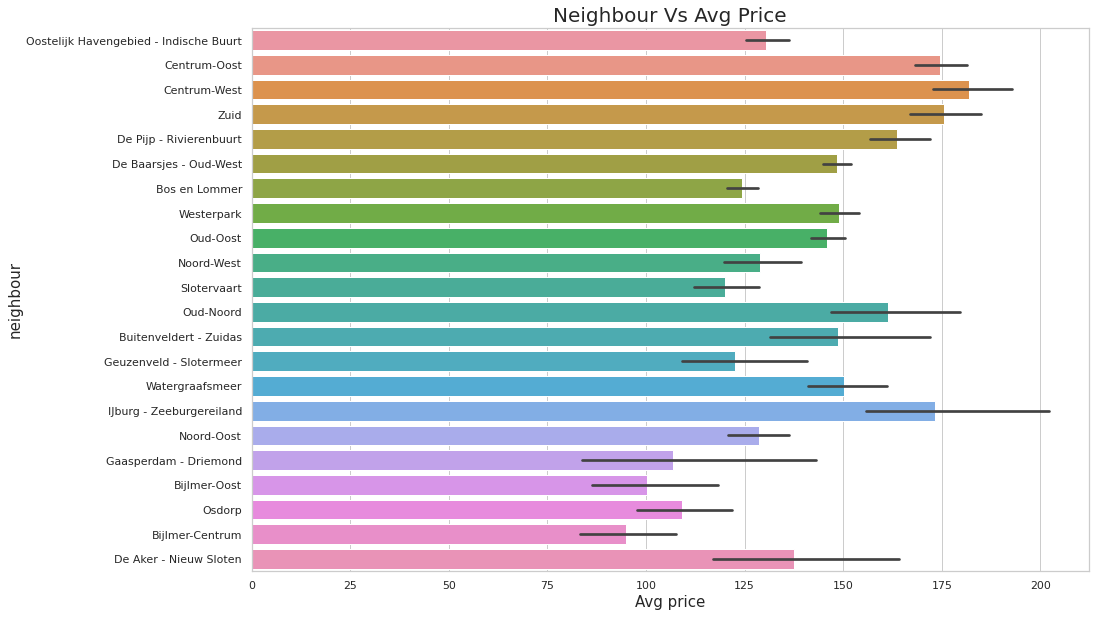

time: 1.2 s (started: 2021-06-04 07:48:27 +00:00)


In [117]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(data = df,y="neighbourhood_cleansed", x="price", estimator=np.mean)
ax.set_title('Neighbour Vs Avg Price', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax.set_ylabel("neighbour", fontsize=15)
ax.set_xlabel("Avg price", fontsize=15)
plt.show();

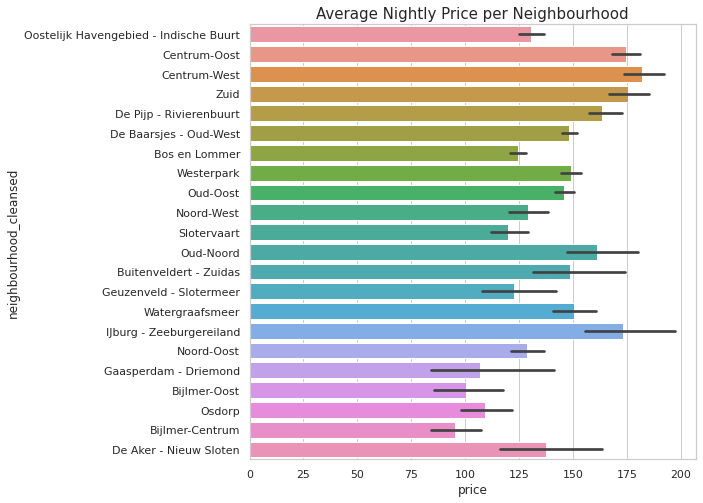

time: 1.13 s (started: 2021-06-04 07:48:29 +00:00)


In [118]:
# your code...
plt.figure(figsize=(8,8))
ax = sns.barplot(x='price', y="neighbourhood_cleansed", data=df,estimator=np.mean)
ax.set_title('Average Nightly Price per Neighbourhood', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.show()

Plot a correlation matrix as instructed in the Coursework proforma:

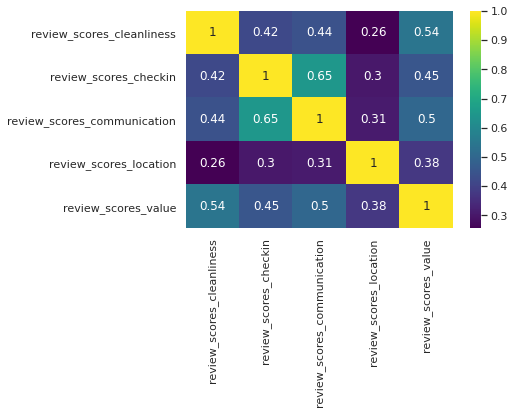

time: 408 ms (started: 2021-06-04 07:48:30 +00:00)


In [119]:

data=df[['review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
sns.heatmap(data.corr(),cmap='viridis',annot=True)

Plot a geographical distribution as instructed in the Coursework proforma:

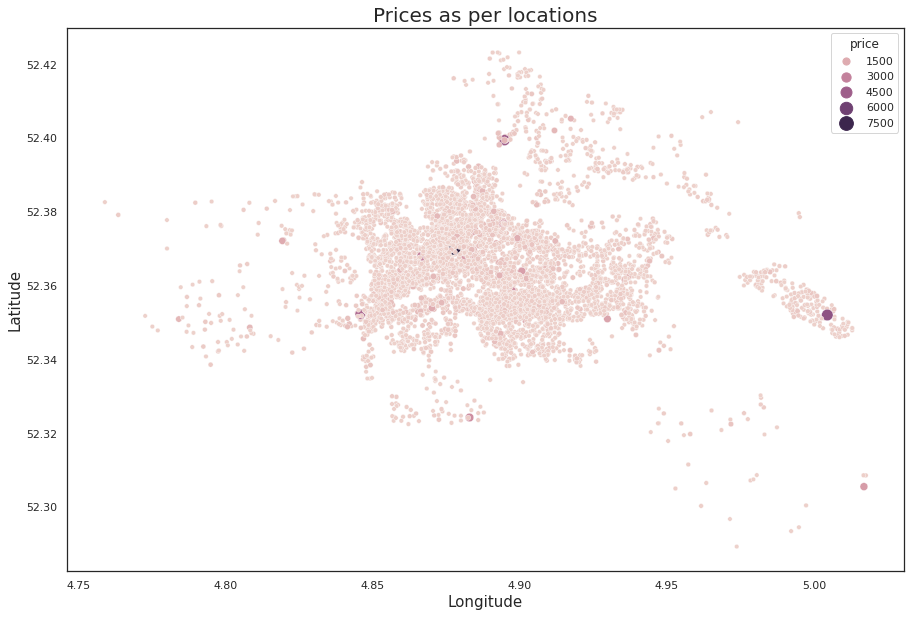

time: 602 ms (started: 2021-06-04 07:48:30 +00:00)


In [120]:
df_price = df[df['price']>150]
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
 data=df_price, y='latitude', x='longitude', hue="price", size="price",
 sizes=(20, 200))
ax.set_title("Prices as per locations", fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax.set_ylabel("Latitude", fontsize=15)
ax.set_xlabel("Longitude", fontsize=15)
plt.show();


---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [121]:
# your linear regression code...

# deal with nan values replacing with MEAN
Column_list=df[["review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","review_scores_rating"]]

# df_pred
for col in Column_list:
  Mean= int (Column_list[col].mean()) # calculate mean each column wise.
  Column_list[col].fillna((Mean), inplace=True)
Linear_Regression=Column_list
Linear_Regression.columns=["accuracy","cleanliness","checkin","communication","location","value","rating"]
 
fit=sm.OLS.from_formula("rating~accuracy+cleanliness+checkin+communication+location+value",Linear_Regression).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5943.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:48:31   Log-Likelihood:                -50787.
No. Observations:               18522   AIC:                         1.016e+05
Df Residuals:                   18515   BIC:                         1.016e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.0992      0.507     29.783

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): The rooms combos with significantly different prices were Entire Home/Hotel, Entire Home/Private, Entire Home/Shared, Hotel/Shared.


Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): with bonferroni correction Entire Home/Private and Hotel/Private were the only room combos with significantly different prices


In [122]:
# your t-test code...
from scipy.stats import ttest_ind
df_Private_room=df[df.room_type=='Private room']["price"].dropna()
df_Entire_home=df[df.room_type=='Entire home/apt']["price"].dropna()
df_Hotel_room=df[df.room_type=='Hotel room']["price"].dropna()
df_Shared_room=df[df.room_type=='Shared room']["price"].dropna()

# it's significant when < 0.01 (alpha)
Value1=('{:.5f}'.format(float(ttest_ind(df_Private_room,df_Entire_home).pvalue))) # p value of private_room and Entire_room
Value2=('{:.5f}'.format(float(ttest_ind(df_Private_room, df_Hotel_room).pvalue))) # P value of private_room and Hotel_room
Value3=('{:.5f}'.format(float(ttest_ind(df_Private_room, df_Shared_room).pvalue))) # P value of private_room and Shared_room
Value4=('{:.5f}'.format(float(ttest_ind(df_Entire_home, df_Hotel_room).pvalue))) # P value of Entire_room and Hotel_room
Value5=('{:.5f}'.format(float(ttest_ind(df_Entire_home, df_Shared_room).pvalue))) # P value of Entire_room and Shared_room
Value6=('{:.5f}'.format(float(ttest_ind(df_Hotel_room, df_Shared_room).pvalue))) # P value of Hotel_room and Shared_room


# Making 4 by 4 M
table=[
    [0,Value1,Value2,Value3],
    [Value1,0,Value4,Value5],
    [Value2,Value4,0,Value6],
    [Value3,Value5,Value6,0]
]

p_table=pd.DataFrame(table,index=['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],columns=['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'])
p_table

,Private room,Entire home/apt,Hotel room,Shared room
Private room,0,0.00000,0.00006,0.45169
Entire home/apt,0.00000,0,0.00293,0.00218
Hotel room,0.00006,0.00293,0,0.31212
Shared room,0.45169,0.00218,0.31212,0


time: 68.6 ms (started: 2021-06-04 07:48:31 +00:00)


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: I choose those variable which has float or Int values 

In [123]:
df_nan = pd.DataFrame(df[['host_is_superhost','host_listings_count','host_has_profile_pic','bedrooms','beds','reviews_per_month']])
# df_pred
for col in ['host_is_superhost','host_listings_count','host_has_profile_pic','bedrooms','beds','reviews_per_month']:
            maan = int (df_nan[col].mean())
            # print(maan)
            df[col].fillna((maan), inplace=True) # reflect changes back to initial dataframe df

time: 10.1 ms (started: 2021-06-04 07:48:31 +00:00)


In [124]:
df_new=pd.get_dummies(df.room_type,prefix="room_type")
df_new=pd.concat([df,df_new],axis=1)
df_new=df_new.drop("room_type",axis=1)
df_new.rename(columns={"room_type_Entire home/apt":"Entire_home",'room_type_Hotel room':'Hotel_room',
                       'room_type_Private room':'Private_room','room_type_Shared room':'Shared_room'},inplace=True)

time: 31.5 ms (started: 2021-06-04 07:48:31 +00:00)


In [125]:

def variable_selection(df_new, predictors, alpha = 0.05):
  dik = {}
  d_strr = ''
  max = []
  larg=[]
  larg1 = -30
  next_iter = ''
  for j in range(len(predictors)):
    for i in predictors:
      dev = 'price ~'
      if i not in max:   #  Will avoid addition of duplicate attributes in the max list
        for k in (max):   # used to convert list elements into string
          d_strr += k + '+'
        R_score=sm.OLS.from_formula(dev + d_strr + i,df_new).fit().rsquared # calculate R score for each combination
        dik.update({i:R_score})
        s_dict=dict(sorted(dik.items(),key=operator.itemgetter(1),reverse=True)) # sort the dict elements in an order
        larg = list(s_dict.values())[0]  # store the key value of first elements from dict to variable
        next_iter = next(iter(s_dict))
  
   # Will verify if previous calculated r score value is less than new value then add into the list
    if larg1 < larg: 
      larg1 = larg  
      if next_iter not in max:
        max.append(next_iter)
    else:
      break

  return max

time: 19.3 ms (started: 2021-06-04 07:48:31 +00:00)


In [126]:
predictors = [ 'availability_365','number_of_reviews','instant_bookable','host_listings_count','latitude','bedrooms','review_scores_value',
              'maximum_nights','host_days','Entire_home','Hotel_room','Private_room','Shared_room','beds']
alpha = 0.05
max=variable_selection(df_new, predictors, alpha) # call function
max

['bedrooms',
 'review_scores_value',
 'Private_room',
 'availability_365',
 'beds',
 'host_listings_count',
 'number_of_reviews',
 'Entire_home',
 'host_days',
 'latitude',
 'maximum_nights',
 'instant_bookable',
 'Hotel_room']

time: 4.98 s (started: 2021-06-04 07:48:31 +00:00)


In [127]:

def remove_var(df_new, max, alpha):
  '''Using  p value  drop the variables .
  '''

  dick1 = {}
  p_larg = []
  p_next_iter = ''
  alpha = 0.05
  counter =0
  dick = {}
  d_strr = ''
  d_lst = []
  max_final= []
  larg=[]
  larg1 = -30
  next_iter = ''
  maxx = []  
  s_dict = {}

  for j in range(len(max)):
    for i in max:
      # dz =pd.Series(df[i])
      p_val = ttest_ind(df['price'], df_new[i]).pvalue
      dick1.update({i:p_val})
      p_dict=dict(sorted(dick1.items(),key=operator.itemgetter(1),reverse=True))
      p_larg = list(s_dict.values())[0]
      p_next_iter = next(iter(s_dict))  

    if p_larg > alpha :
      max.remove(p_next_iter)
      predictors = max
      for j in range(len(max)):
        for i in max:
          dev = 'price ~'
          if i not in max:        #  Will avoid addition of duplicate attributes in the max list    
            for k in (max):       # used to convert list elements into string
              d_strr += k + '+'
            R_score=sm.OLS.from_formula(dev + d_strr + i,df_new).fit().rsquared  # calculate R score for each combination
            dick.update({i:R_score})
            s_dict=dict(sorted(dick.items(),key=operator.itemgetter(1),reverse=True))
            larg = list(s_dict.values())[0]  # store the key value of first elements from dict to variable
            next_iter = next(iter(s_dict))

      # Will verify if previous calculated r score value is less than new value then add into the list
      if larg1 < larg:
        larg1 = larg  
        if next_iter not in max:
          max.append(next_iter)
      else:
        break
  print(max)
  print(len(max))
  return max 


time: 49.6 ms (started: 2021-06-04 07:48:36 +00:00)


## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [128]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):

  '''The function will take dataframe as argument, a range of budget from minimum and maximum and the variable 
  relative is a Boolean specifying whether relative numbers (fractions) should be considered 
  in the recommendation. If False, absolute numbers are considered instead. '''

  neighb_list = ['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
        'Centrum-West', 'Zuid', 'De Pijp - Rivierenbuurt',
        'De Baarsjes - Oud-West', 'Bos en Lommer', 'Westerpark',
        'Oud-Oost', 'Noord-West', 'Slotervaart', 'Oud-Noord',
        'Buitenveldert - Zuidas', 'Geuzenveld - Slotermeer',
        'Watergraafsmeer', 'IJburg - Zeeburgereiland', 'Noord-Oost',
        'Gaasperdam - Driemond', 'Bijlmer-Oost', 'Osdorp',
        'Bijlmer-Centrum', 'De Aker - Nieuw Sloten']
  neighb_hood = []
  for i in tqdm(df['neighbourhood_cleansed']):
    neighb_hood.append(i)
    dic_neigh = dict(Counter(neighb_hood))
    dic_neigh_sorted = dict(sorted(dic_neigh.items(),key=operator.itemgetter(1),reverse=True))
  min_bud = float(budget_min)
  max_bud = float(budget_max)
  
  sorted_large_dic = {}
  large_dic = {}
  lst_large_neigh = []
  for count, value in enumerate(df['price']):
    if value in np.arange(min_bud,max_bud):
      lst_large_neigh.append(df['neighbourhood_cleansed'][count])
      large_dic=dict(Counter(lst_large_neigh))
      sorted_large_dic=dict(sorted(large_dic.items(),key=operator.itemgetter(1),reverse=True))
  # calculating absolute value and storing it in dictionary
  ab_result = (next(iter(sorted_large_dic)))
  def checkKey(dic, key):
    ''' This function checks whether key is present in dictionary or not 
        argument : dictionary , key (string)
        return   : int '''
    if key in dic.keys():
      val = dic[key]
    else:
      val = 0
    return val   

  # iterating through the list of all neighbours in dataframe     
  rel_dic = {}
  for i in neighb_list:
    ab = 0
    rl = 0
    ab = checkKey(sorted_large_dic,i)
    rel = checkKey(dic_neigh_sorted,i)
    rel_val = float(ab/rel)           # calculating relative value
    rel_dic.update({i:rel_val})       # updating values in dictionary
    sort_rel_dic = dict(sorted(rel_dic.items(),key=operator.itemgetter(1),reverse=True))
  rel_result = next(iter(sort_rel_dic))
 
  # checking if user requires relative or absolute value
  if relative is True:
    return rel_result
  else:
    return ab_result

 


recommend_neighbourhood(df,10,50,False) # Function call

100%|██████████| 18522/18522 [00:10<00:00, 1837.38it/s]


'De Baarsjes - Oud-West'

time: 10.3 s (started: 2021-06-04 07:48:36 +00:00)


### Price recommender for hosts

In [129]:

def recommend_price(df, latitude, longitude,n_neighbours, room_t = None):
  '''
  This function recommend price to the user by taking consideration of below arguments:
  argument : DataFrame , latitude (float number),longitude (float number),n_neighbours(integer), room type(string)
  return   : average nighty price (float)
  '''
  pd.options.mode.chained_assignment = None
  # room type user is allowed to enter
  room_list = ['Private room', 'Entire home/apt', 'Hotel room', 'Shared room',None] 
  if room_t in room_list:
    df['distance'] = 0.000
    # converting user input location into 1D array
    user_loc = (latitude,longitude)              
    for i in tqdm(range(len(df.longitude))):
      lat = df['latitude'][i]
      lon = df['longitude'][i]
      host_loc = (lat,lon)
      # calculating euclidean distance and storing it in new column
      df['distance'][i] = distance.euclidean(user_loc, host_loc)   #
    if room_t == None:

      # sorting distance to find the closest property
      df_sorted = df.sort_values('distance')          
      df_sorted = df_sorted[0:n_neighbours]
      price_mean = df_sorted['price'].mean()
      return price_mean
    else:

      # sorting dataframe according to the room type
      df_room = df[df.room_type.eq(room_t)]          
      df_room = df_room.sort_values('distance')
      # triming dataframe according to the number of neighbours
      df_room = df_room[0:n_neighbours] 

      # calculating mean value of price.               
      room_price_mean = df_room['price'].mean()        
      return room_price_mean
  else:
    # if user enter room type that is not defined/ none then return this string
    return 'room type not defined'                     


# function call
recommend_price(df,37.6767,5.76768,10,'Entire home/apt')

100%|██████████| 18522/18522 [00:02<00:00, 8069.96it/s]


115.4

time: 2.34 s (started: 2021-06-04 07:48:46 +00:00)
